In [1]:
import os, sys
import numpy as np
import pickle
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = "12"
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["lines.markersize"] = 4
plt.rcParams["lines.markeredgewidth"] = 2
plt.rcParams["font.family"] = "serif"

In [2]:
all_sinr = np.arange(-30, 0.1, 3)


def compute_mse_score(mse_mean):
    return np.mean(np.maximum(mse_mean, -50))


def compute_ber_score(ber_mean, ber_thr=1e-2):
    sinr_level = 3
    for i in range(len(all_sinr), 0, -1):
        if ber_mean[i - 1] <= ber_thr:
            sinr_level = all_sinr[i - 1]
        else:
            break
    return sinr_level

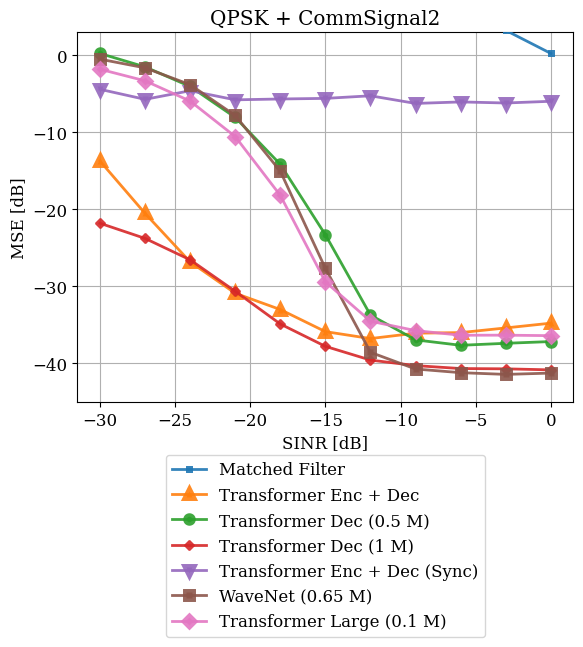

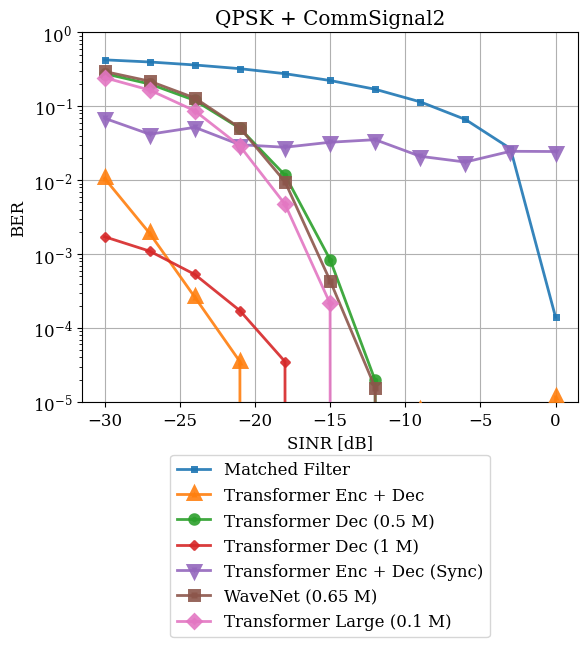

In [5]:
testset_identifier = "TestSet1Mixture"

all_methods_string = [
    "matched_filter",
    "transformer",
    "transformer_decoder",
    "transformer_decoder_1M",
    "transformer_synchronized",
    "wavenet",
    "transformer_large_100k"
]

label_dict = {
    "matched_filter": "Matched Filter",
    "transformer": "Transformer Enc + Dec",
    "transformer_decoder": "Transformer Dec (0.5 M)",
    "transformer_decoder_1M": "Transformer Dec (1 M)",
    "transformer_synchronized": "Transformer Enc + Dec (Sync)",
    "wavenet": "WaveNet (0.65 M)",
    "transformer_large_100k": "Transformer Large (0.1 M)",
}

marker_dict = {
    "matched_filter": "+",
    "transformer": "^",
    "transformer_decoder": "o",
    "transformer_decoder_1M": "x",
    "transformer_synchronized": "v",
    "wavenet": "s",
    "transformer_large_100k": "D",
}
ms_dict = {
    "matched_filter": 4,
    "transformer": 4,
    "transformer_decoder": 4,
    "transformer_decoder_1M": 4,
    "transformer_synchronized": 4,
    "wavenet": 4,
    "transformer_large_100k": 4,
}
mew_dict = {
    "matched_filter": 5,
    "transformer": 5,
    "transformer_decoder": 5,
    "transformer_decoder_1M": 5,
    "transformer_synchronized": 5,
    "wavenet": 5,
    "transformer_large_100k": 5,
}
zorder_dict = {
    "matched_filter": 90,
    "transformer": 90,
    "transformer_decoder": 90,
    "transformer_decoder_1M": 90,
    "transformer_synchronized": 90,
    "wavenet": 90,
    "transformer_large_100k": 90,
}

if not os.path.exists("/home/tejasj/data2/RF_transformer/eval_outputs/figures"):
    os.makedirs("/home/tejasj/data2/RF_transformer/eval_outputs/figures")

for soi_type in ["QPSK"]:
    for interference_sig_type in ["CommSignal2"]:
        mse_to_plot, ber_to_plot = {}, {}
        for id_string in all_methods_string:
            try:
                mse_mean, ber_mean = pickle.load(
                    open(
                        os.path.join(
                            "/home/tejasj/data2/RF_transformer/eval_outputs",
                            "results",
                            "unsynchronized",
                            f"{id_string}_{testset_identifier}_exports_summary_"
                            f"{soi_type}_{interference_sig_type}.pkl",
                        ),
                        "rb",
                    )
                )
            except FileNotFoundError:
                mse_mean, ber_mean = pickle.load(
                    open(
                        os.path.join(
                            "/home/tejasj/data2/RF_transformer/eval_outputs",
                            "results",
                            "unsynchronized_large",
                            f"{id_string}_{testset_identifier}_exports_summary_"
                            f"{soi_type}_{interference_sig_type}.pkl",
                        ),
                        "rb",
                    )
                )
            mse_to_plot[id_string] = mse_mean
            ber_to_plot[id_string] = ber_mean

        # figsize = (6.4,2.8)
        plt.figure()
        for id_str in mse_to_plot.keys():
            marker_style = "x--" if "Default" in id_str else marker_dict[id_str] + "-"
            plt.plot(
                all_sinr,
                mse_to_plot[id_str],
                marker_style,
                label=label_dict[id_str],
                alpha=0.6 if "Default" in id_str else 0.9,
                ms=ms_dict[id_str],
                mew=mew_dict[id_str],
                zorder=zorder_dict[id_str],
            )
        plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12))
        plt.grid()
        plt.gca().set_ylim(top=3)
        if soi_type == "QPSK" and interference_sig_type == "EMISignal1":
            plt.gca().set_ylim(bottom=-65)
        plt.xlabel("SINR [dB]")
        plt.ylabel("MSE [dB]")
        plt.title(f"{soi_type} + {interference_sig_type}")

        plt.savefig(
            os.path.join(
                "/home/tejasj/data2/RF_transformer/eval_outputs/figures",
                f"collated_MSE_{soi_type}_{interference_sig_type}_Comparison.png",
            ),
            dpi=300,
            bbox_inches="tight",
        )

        plt.figure()
        for id_str in ber_to_plot.keys():
            marker_style = "x--" if "Default" in id_str else marker_dict[id_str] + "-"
            plt.semilogy(
                all_sinr,
                ber_to_plot[id_str],
                marker_style,
                label=label_dict[id_str],
                alpha=0.6 if "Default" in id_str else 0.9,
                ms=ms_dict[id_str],
                mew=mew_dict[id_str],
                zorder=zorder_dict[id_str],
            )
        plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12))
        plt.grid()
        plt.ylim([1e-5, 1])
        plt.xlabel("SINR [dB]")
        plt.ylabel("BER")
        plt.title(f"{soi_type} + {interference_sig_type}")

        plt.savefig(
            os.path.join(
                "/home/tejasj/data2/RF_transformer/eval_outputs/figures",
                f"collated_BER_{soi_type}_{interference_sig_type}_Comparison.png",
            ),
            dpi=300,
            bbox_inches="tight",
        )

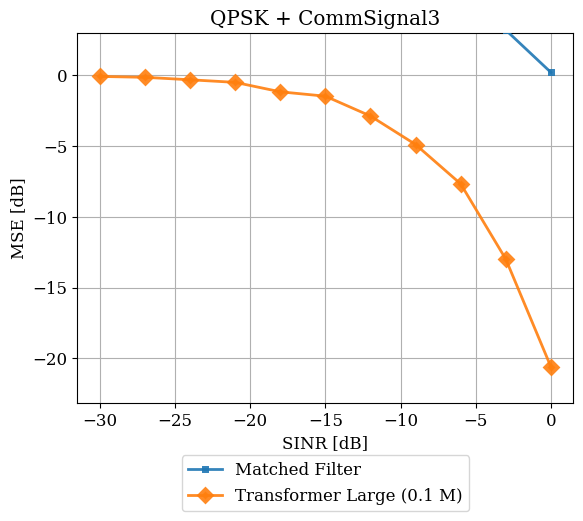

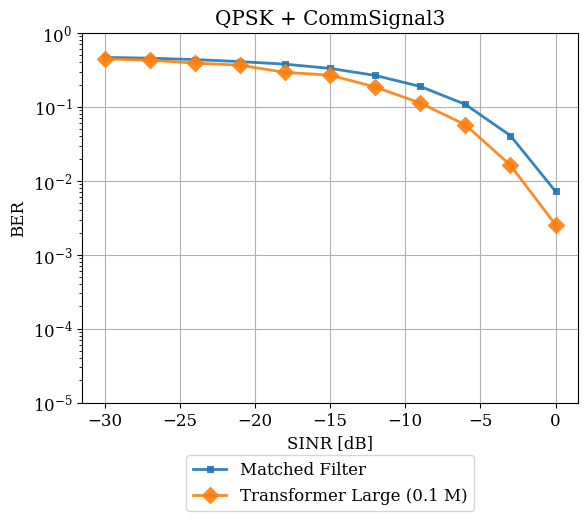

In [4]:
testset_identifier = "TestSet1Mixture"

all_methods_string = [
    "matched_filter",
    "transformer_large_100k"
]

label_dict = {
    "matched_filter": "Matched Filter",
    "transformer_large_100k": "Transformer Large (0.1 M)",
}

marker_dict = {
    "matched_filter": "+",
    "transformer_large_100k": "D",
}
ms_dict = {
    "matched_filter": 4,
    "transformer_large_100k": 4,
}
mew_dict = {
    "matched_filter": 5,
    "transformer_large_100k": 5,
}
zorder_dict = {
    "matched_filter": 90,
    "transformer_large_100k": 90,
}

if not os.path.exists("/home/tejasj/data2/RF_transformer/eval_outputs/figures"):
    os.makedirs("/home/tejasj/data2/RF_transformer/eval_outputs/figures")

for soi_type in ["QPSK"]:
    for interference_sig_type in ["CommSignal3"]:
        mse_to_plot, ber_to_plot = {}, {}
        for id_string in all_methods_string:
            try:
                mse_mean, ber_mean = pickle.load(
                    open(
                        os.path.join(
                            "/home/tejasj/data2/RF_transformer/eval_outputs",
                            "results",
                            "unsynchronized",
                            f"{id_string}_{testset_identifier}_exports_summary_"
                            f"{soi_type}_{interference_sig_type}.pkl",
                        ),
                        "rb",
                    )
                )
            except FileNotFoundError:
                mse_mean, ber_mean = pickle.load(
                    open(
                        os.path.join(
                            "/home/tejasj/data2/RF_transformer/eval_outputs",
                            "results",
                            "unsynchronized_large",
                            f"{id_string}_{testset_identifier}_exports_summary_"
                            f"{soi_type}_{interference_sig_type}.pkl",
                        ),
                        "rb",
                    )
                )
            mse_to_plot[id_string] = mse_mean
            ber_to_plot[id_string] = ber_mean

        # figsize = (6.4,2.8)
        plt.figure()
        for id_str in mse_to_plot.keys():
            marker_style = "x--" if "Default" in id_str else marker_dict[id_str] + "-"
            plt.plot(
                all_sinr,
                mse_to_plot[id_str],
                marker_style,
                label=label_dict[id_str],
                alpha=0.6 if "Default" in id_str else 0.9,
                ms=ms_dict[id_str],
                mew=mew_dict[id_str],
                zorder=zorder_dict[id_str],
            )
        plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12))
        plt.grid()
        plt.gca().set_ylim(top=3)
        if soi_type == "QPSK" and interference_sig_type == "EMISignal1":
            plt.gca().set_ylim(bottom=-65)
        plt.xlabel("SINR [dB]")
        plt.ylabel("MSE [dB]")
        plt.title(f"{soi_type} + {interference_sig_type}")

        plt.savefig(
            os.path.join(
                "/home/tejasj/data2/RF_transformer/eval_outputs/figures",
                f"collated_MSE_{soi_type}_{interference_sig_type}_Comparison.png",
            ),
            dpi=300,
            bbox_inches="tight",
        )

        plt.figure()
        for id_str in ber_to_plot.keys():
            marker_style = "x--" if "Default" in id_str else marker_dict[id_str] + "-"
            plt.semilogy(
                all_sinr,
                ber_to_plot[id_str],
                marker_style,
                label=label_dict[id_str],
                alpha=0.6 if "Default" in id_str else 0.9,
                ms=ms_dict[id_str],
                mew=mew_dict[id_str],
                zorder=zorder_dict[id_str],
            )
        plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12))
        plt.grid()
        plt.ylim([1e-5, 1])
        plt.xlabel("SINR [dB]")
        plt.ylabel("BER")
        plt.title(f"{soi_type} + {interference_sig_type}")

        plt.savefig(
            os.path.join(
                "/home/tejasj/data2/RF_transformer/eval_outputs/figures",
                f"collated_BER_{soi_type}_{interference_sig_type}_Comparison.png",
            ),
            dpi=300,
            bbox_inches="tight",
        )

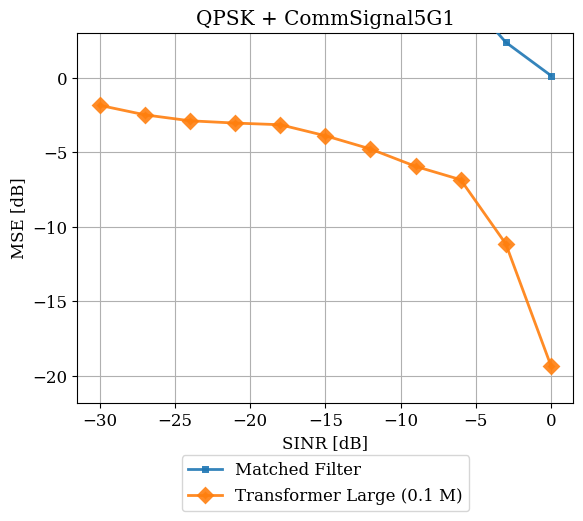

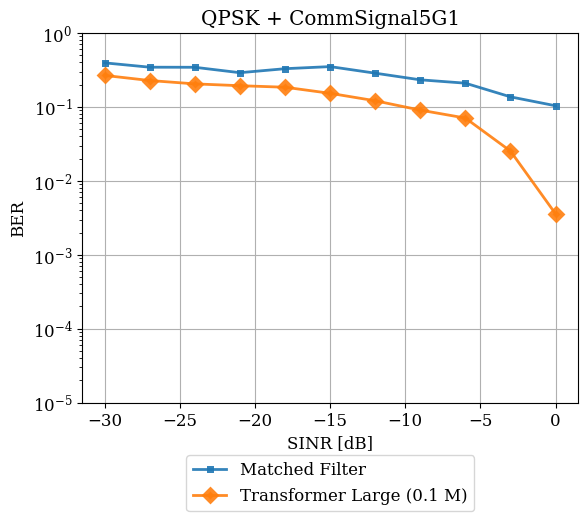

In [5]:
testset_identifier = "TestSet1Mixture"

all_methods_string = [
    "matched_filter",
    "transformer_large_100k"
]

label_dict = {
    "matched_filter": "Matched Filter",
    "transformer_large_100k": "Transformer Large (0.1 M)",
}

marker_dict = {
    "matched_filter": "+",
    "transformer_large_100k": "D",
}
ms_dict = {
    "matched_filter": 4,
    "transformer_large_100k": 4,
}
mew_dict = {
    "matched_filter": 5,
    "transformer_large_100k": 5,
}
zorder_dict = {
    "matched_filter": 90,
    "transformer_large_100k": 90,
}

if not os.path.exists("/home/tejasj/data2/RF_transformer/eval_outputs/figures"):
    os.makedirs("/home/tejasj/data2/RF_transformer/eval_outputs/figures")

for soi_type in ["QPSK"]:
    for interference_sig_type in ["CommSignal5G1"]:
        mse_to_plot, ber_to_plot = {}, {}
        for id_string in all_methods_string:
            try:
                mse_mean, ber_mean = pickle.load(
                    open(
                        os.path.join(
                            "/home/tejasj/data2/RF_transformer/eval_outputs",
                            "results",
                            "unsynchronized",
                            f"{id_string}_{testset_identifier}_exports_summary_"
                            f"{soi_type}_{interference_sig_type}.pkl",
                        ),
                        "rb",
                    )
                )
            except FileNotFoundError:
                mse_mean, ber_mean = pickle.load(
                    open(
                        os.path.join(
                            "/home/tejasj/data2/RF_transformer/eval_outputs",
                            "results",
                            "unsynchronized_large",
                            f"{id_string}_{testset_identifier}_exports_summary_"
                            f"{soi_type}_{interference_sig_type}.pkl",
                        ),
                        "rb",
                    )
                )
            mse_to_plot[id_string] = mse_mean
            ber_to_plot[id_string] = ber_mean

        # figsize = (6.4,2.8)
        plt.figure()
        for id_str in mse_to_plot.keys():
            marker_style = "x--" if "Default" in id_str else marker_dict[id_str] + "-"
            plt.plot(
                all_sinr,
                mse_to_plot[id_str],
                marker_style,
                label=label_dict[id_str],
                alpha=0.6 if "Default" in id_str else 0.9,
                ms=ms_dict[id_str],
                mew=mew_dict[id_str],
                zorder=zorder_dict[id_str],
            )
        plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12))
        plt.grid()
        plt.gca().set_ylim(top=3)
        if soi_type == "QPSK" and interference_sig_type == "EMISignal1":
            plt.gca().set_ylim(bottom=-65)
        plt.xlabel("SINR [dB]")
        plt.ylabel("MSE [dB]")
        plt.title(f"{soi_type} + {interference_sig_type}")

        plt.savefig(
            os.path.join(
                "/home/tejasj/data2/RF_transformer/eval_outputs/figures",
                f"collated_MSE_{soi_type}_{interference_sig_type}_Comparison.png",
            ),
            dpi=300,
            bbox_inches="tight",
        )

        plt.figure()
        for id_str in ber_to_plot.keys():
            marker_style = "x--" if "Default" in id_str else marker_dict[id_str] + "-"
            plt.semilogy(
                all_sinr,
                ber_to_plot[id_str],
                marker_style,
                label=label_dict[id_str],
                alpha=0.6 if "Default" in id_str else 0.9,
                ms=ms_dict[id_str],
                mew=mew_dict[id_str],
                zorder=zorder_dict[id_str],
            )
        plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12))
        plt.grid()
        plt.ylim([1e-5, 1])
        plt.xlabel("SINR [dB]")
        plt.ylabel("BER")
        plt.title(f"{soi_type} + {interference_sig_type}")

        plt.savefig(
            os.path.join(
                "/home/tejasj/data2/RF_transformer/eval_outputs/figures",
                f"collated_BER_{soi_type}_{interference_sig_type}_Comparison.png",
            ),
            dpi=300,
            bbox_inches="tight",
        )

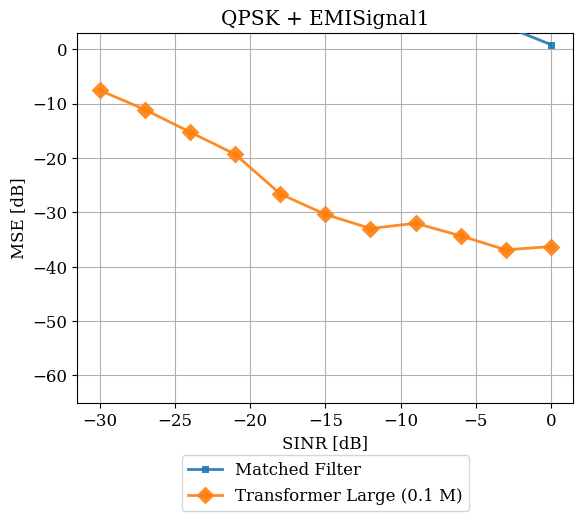

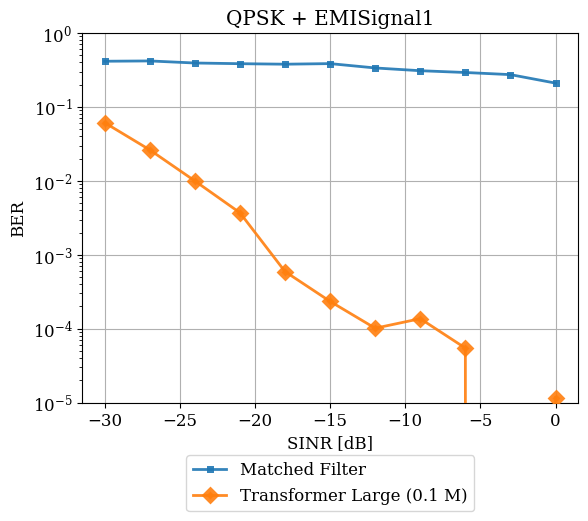

In [6]:
testset_identifier = "TestSet1Mixture"

all_methods_string = [
    "matched_filter",
    "transformer_large_100k"
]

label_dict = {
    "matched_filter": "Matched Filter",
    "transformer_large_100k": "Transformer Large (0.1 M)",
}

marker_dict = {
    "matched_filter": "+",
    "transformer_large_100k": "D",
}
ms_dict = {
    "matched_filter": 4,
    "transformer_large_100k": 4,
}
mew_dict = {
    "matched_filter": 5,
    "transformer_large_100k": 5,
}
zorder_dict = {
    "matched_filter": 90,
    "transformer_large_100k": 90,
}

if not os.path.exists("/home/tejasj/data2/RF_transformer/eval_outputs/figures"):
    os.makedirs("/home/tejasj/data2/RF_transformer/eval_outputs/figures")

for soi_type in ["QPSK"]:
    for interference_sig_type in ["EMISignal1"]:
        mse_to_plot, ber_to_plot = {}, {}
        for id_string in all_methods_string:
            try:
                mse_mean, ber_mean = pickle.load(
                    open(
                        os.path.join(
                            "/home/tejasj/data2/RF_transformer/eval_outputs",
                            "results",
                            "unsynchronized",
                            f"{id_string}_{testset_identifier}_exports_summary_"
                            f"{soi_type}_{interference_sig_type}.pkl",
                        ),
                        "rb",
                    )
                )
            except FileNotFoundError:
                mse_mean, ber_mean = pickle.load(
                    open(
                        os.path.join(
                            "/home/tejasj/data2/RF_transformer/eval_outputs",
                            "results",
                            "unsynchronized_large",
                            f"{id_string}_{testset_identifier}_exports_summary_"
                            f"{soi_type}_{interference_sig_type}.pkl",
                        ),
                        "rb",
                    )
                )
            mse_to_plot[id_string] = mse_mean
            ber_to_plot[id_string] = ber_mean

        # figsize = (6.4,2.8)
        plt.figure()
        for id_str in mse_to_plot.keys():
            marker_style = "x--" if "Default" in id_str else marker_dict[id_str] + "-"
            plt.plot(
                all_sinr,
                mse_to_plot[id_str],
                marker_style,
                label=label_dict[id_str],
                alpha=0.6 if "Default" in id_str else 0.9,
                ms=ms_dict[id_str],
                mew=mew_dict[id_str],
                zorder=zorder_dict[id_str],
            )
        plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12))
        plt.grid()
        plt.gca().set_ylim(top=3)
        if soi_type == "QPSK" and interference_sig_type == "EMISignal1":
            plt.gca().set_ylim(bottom=-65)
        plt.xlabel("SINR [dB]")
        plt.ylabel("MSE [dB]")
        plt.title(f"{soi_type} + {interference_sig_type}")

        plt.savefig(
            os.path.join(
                "/home/tejasj/data2/RF_transformer/eval_outputs/figures",
                f"collated_MSE_{soi_type}_{interference_sig_type}_Comparison.png",
            ),
            dpi=300,
            bbox_inches="tight",
        )

        plt.figure()
        for id_str in ber_to_plot.keys():
            marker_style = "x--" if "Default" in id_str else marker_dict[id_str] + "-"
            plt.semilogy(
                all_sinr,
                ber_to_plot[id_str],
                marker_style,
                label=label_dict[id_str],
                alpha=0.6 if "Default" in id_str else 0.9,
                ms=ms_dict[id_str],
                mew=mew_dict[id_str],
                zorder=zorder_dict[id_str],
            )
        plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12))
        plt.grid()
        plt.ylim([1e-5, 1])
        plt.xlabel("SINR [dB]")
        plt.ylabel("BER")
        plt.title(f"{soi_type} + {interference_sig_type}")

        plt.savefig(
            os.path.join(
                "/home/tejasj/data2/RF_transformer/eval_outputs/figures",
                f"collated_BER_{soi_type}_{interference_sig_type}_Comparison.png",
            ),
            dpi=300,
            bbox_inches="tight",
        )

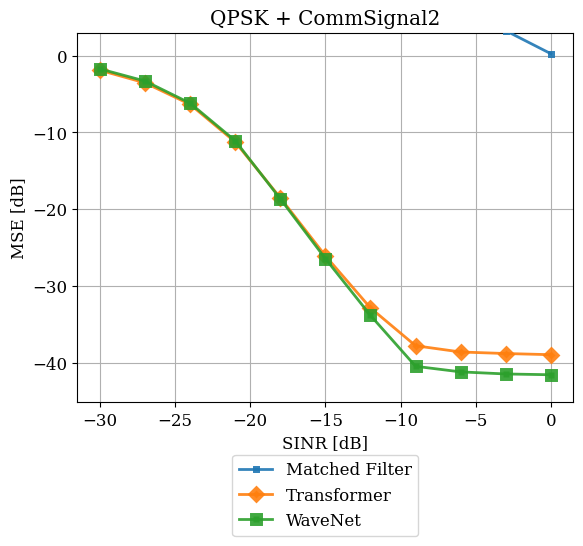

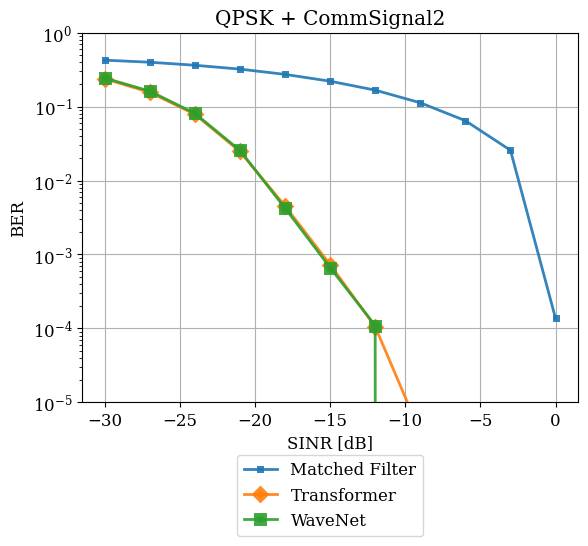

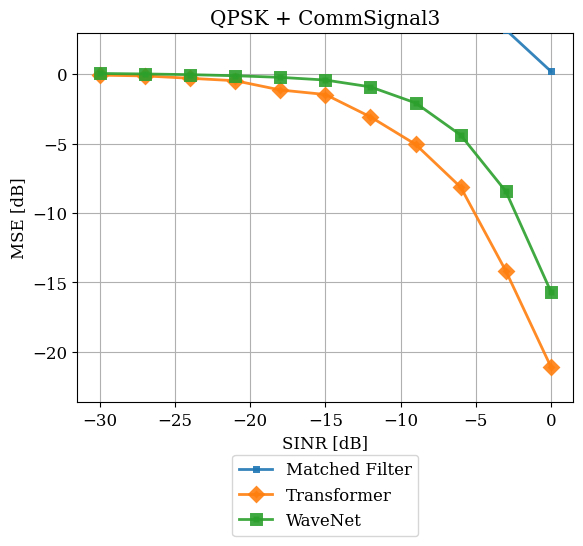

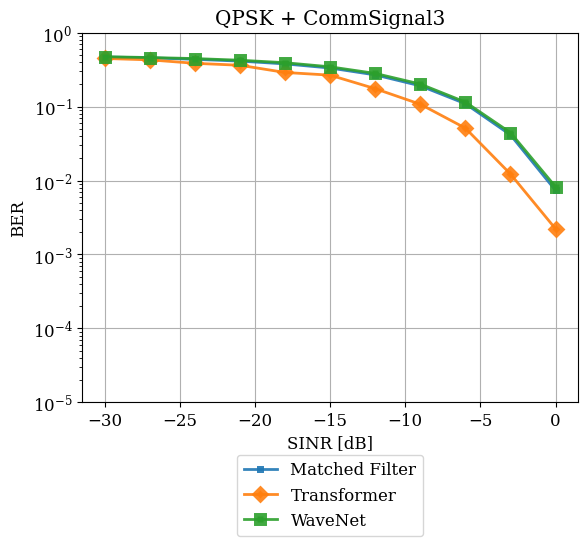

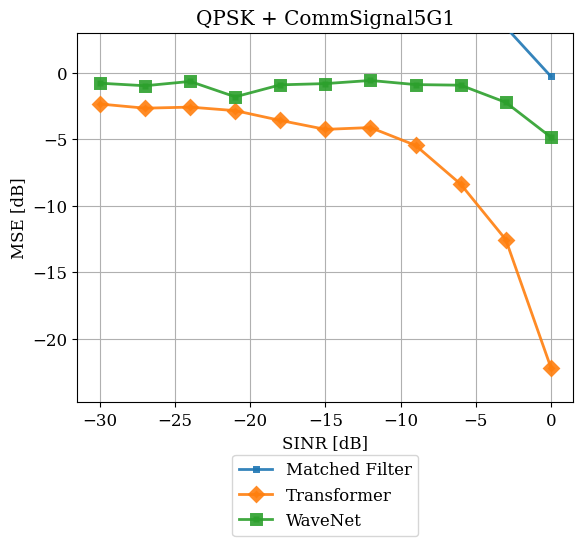

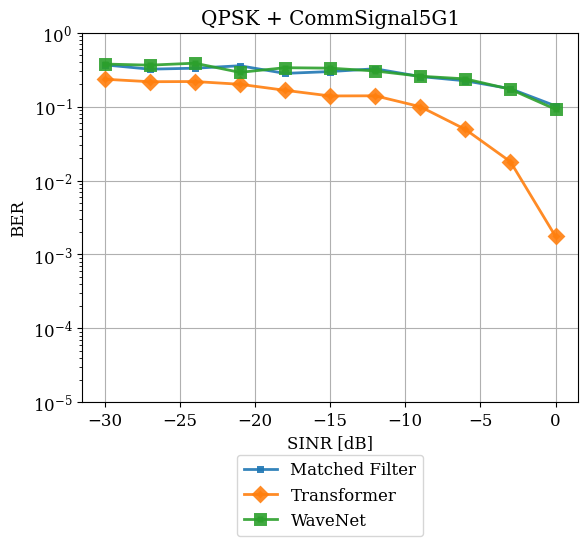

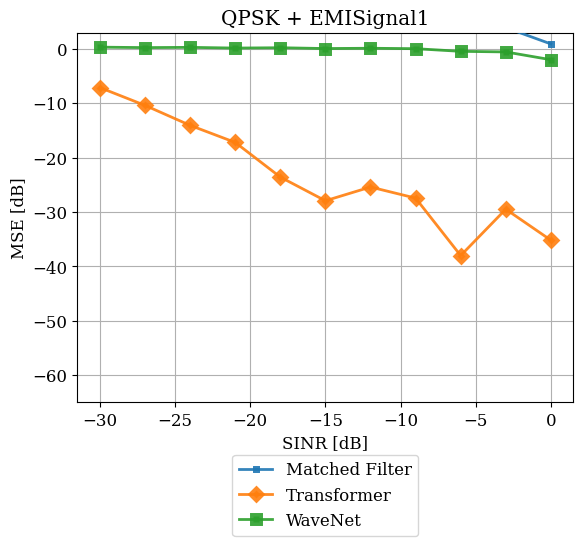

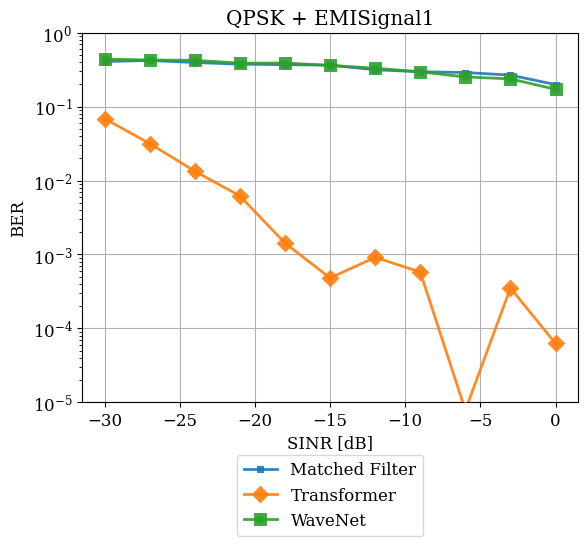

In [8]:
testset_identifier = "TestSet2Mixture"

all_methods_string = [
    "matched_filter",
    "transformer_large_125k",
    "wavenet_large_95k"
]

label_dict = {
    "matched_filter": "Matched Filter",
    "transformer_large_125k": "Transformer",
    "wavenet_large_95k": "WaveNet",
}

marker_dict = {
    "matched_filter": "+",
    "transformer_large_125k": "D",
    "wavenet_large_95k": "s",
}
ms_dict = {
    "matched_filter": 4,
    "transformer_large_125k": 4,
    "wavenet_large_95k": 4,
}
mew_dict = {
    "matched_filter": 5,
    "transformer_large_125k": 5,
    "wavenet_large_95k": 5,
}
zorder_dict = {
    "matched_filter": 90,
    "transformer_large_125k": 90,
    "wavenet_large_95k": 90,
}

if not os.path.exists("/home/tejasj/data2/RF_transformer/eval_outputs/figures"):
    os.makedirs("/home/tejasj/data2/RF_transformer/eval_outputs/figures")

for soi_type in ["QPSK"]:
    for interference_sig_type in ["CommSignal2", "CommSignal3", "CommSignal5G1", "EMISignal1"]:
        mse_to_plot, ber_to_plot = {}, {}
        for id_string in all_methods_string:
            try:
                mse_mean, ber_mean = pickle.load(
                    open(
                        os.path.join(
                            "/home/tejasj/data2/RF_transformer/eval_outputs",
                            "results",
                            "unsynchronized",
                            f"{id_string}_{testset_identifier}_exports_summary_"
                            f"{soi_type}_{interference_sig_type}.pkl",
                        ),
                        "rb",
                    )
                )
            except FileNotFoundError:
                mse_mean, ber_mean = pickle.load(
                    open(
                        os.path.join(
                            "/home/tejasj/data2/RF_transformer/eval_outputs",
                            "results",
                            "unsynchronized_large",
                            f"{id_string}_{testset_identifier}_exports_summary_"
                            f"{soi_type}_{interference_sig_type}.pkl",
                        ),
                        "rb",
                    )
                )
            else:
                pass 
            
            mse_to_plot[id_string] = mse_mean
            ber_to_plot[id_string] = ber_mean

        # figsize = (6.4,2.8)
        plt.figure()
        for id_str in mse_to_plot.keys():
            marker_style = "x--" if "Default" in id_str else marker_dict[id_str] + "-"
            plt.plot(
                all_sinr,
                mse_to_plot[id_str],
                marker_style,
                label=label_dict[id_str],
                alpha=0.6 if "Default" in id_str else 0.9,
                ms=ms_dict[id_str],
                mew=mew_dict[id_str],
                zorder=zorder_dict[id_str],
            )
        plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12))
        plt.grid()
        plt.gca().set_ylim(top=3)
        if soi_type == "QPSK" and interference_sig_type == "EMISignal1":
            plt.gca().set_ylim(bottom=-65)
        plt.xlabel("SINR [dB]")
        plt.ylabel("MSE [dB]")
        plt.title(f"{soi_type} + {interference_sig_type}")

        plt.savefig(
            os.path.join(
                "/home/tejasj/data2/RF_transformer/eval_outputs/figures",
                f"collated_MSE_{soi_type}_{interference_sig_type}_Comparison.png",
            ),
            dpi=300,
            bbox_inches="tight",
        )

        plt.figure()
        for id_str in ber_to_plot.keys():
            marker_style = "x--" if "Default" in id_str else marker_dict[id_str] + "-"
            plt.semilogy(
                all_sinr,
                ber_to_plot[id_str],
                marker_style,
                label=label_dict[id_str],
                alpha=0.6 if "Default" in id_str else 0.9,
                ms=ms_dict[id_str],
                mew=mew_dict[id_str],
                zorder=zorder_dict[id_str],
            )
        plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12))
        plt.grid()
        plt.ylim([1e-5, 1])
        plt.xlabel("SINR [dB]")
        plt.ylabel("BER")
        plt.title(f"{soi_type} + {interference_sig_type}")

        plt.savefig(
            os.path.join(
                "/home/tejasj/data2/RF_transformer/eval_outputs/figures",
                f"collated_BER_{soi_type}_{interference_sig_type}_Comparison.png",
            ),
            dpi=300,
            bbox_inches="tight",
        )